In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("../practice/practice_datasets/fish_specices.csv")
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
66,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


## Understanding the Data

    Weight - weight of fish in gram
    Lenght1 - vetical length in cm
    Lenght2 - diagonal length in cm
    Lenght3 - cross length in cm
    Height - height in cm
    Width - diagonal width in cam

## Data cleaning

In [3]:
df = df.rename(columns={'Length1':'vertical_len', 'Length2':'diagonal_len', 'Length3':'cross_len'})
df.sample(5)

,Species,Weight,vertical_len,diagonal_len,cross_len,Height,Width
95,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478
110,Perch,556.0,32.0,34.5,36.5,10.2565,6.3875


In [4]:
df.isna().sum()

Species         0
Weight          0
vertical_len    0
diagonal_len    0
cross_len       0
Height          0
Width           0
dtype: int64

## Data Exploration and Visualization

In [5]:
df.describe()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

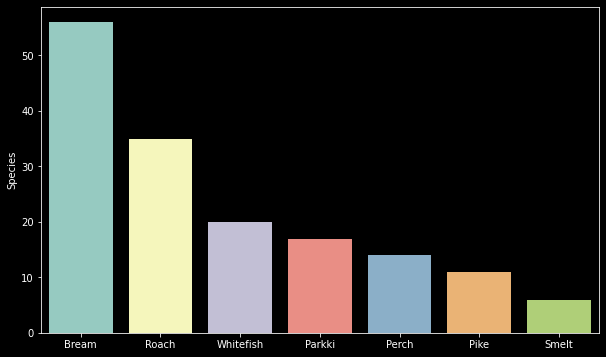

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x=df["Species"].unique(), y=df["Species"].value_counts())
plt.show()

In [8]:
df.corr()

,Weight,vertical_len,diagonal_len,cross_len,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagonal_len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


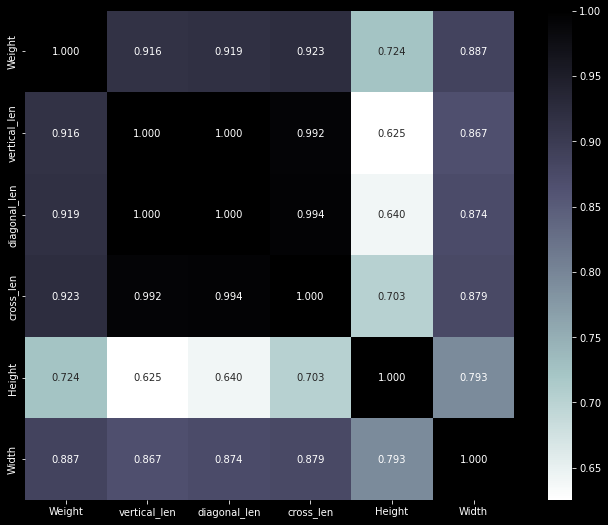

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.bone_r,fmt='.3f', square=True)
plt.show()

## Data Cleaning

Remove the features thats are highly correlated btw each other in independent variables like *['Weight', 'vertical_len', 'diagonal_len', 'cross_len']*

In [10]:
df = df.drop(['vertical_len', 'diagonal_len', 'cross_len'], axis=1)
df.sample(5)

,Species,Weight,Height,Width
72,Perch,5.9,2.1120,1.4080
147,Smelt,7.0,1.7284,1.1484
27,Bream,714.0,16.5170,5.8515
46,Roach,140.0,6.5500,3.3250
1,Bream,290.0,12.4800,4.3056


In [11]:
df1 = df.drop('Species', axis=1)
df1.sample(5)

,Weight,Height,Width
144,1650.0,10.8120,7.4800
62,60.0,6.5772,2.3142
2,340.0,12.3778,4.6961
155,13.4,2.4300,1.2690
46,140.0,6.5500,3.3250


In [12]:
X, y = df1.drop('Weight', axis=1), df1['Weight'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

In [14]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [15]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [16]:
LR_model.score(X_test, y_test)

0.8407009784531243

In [17]:
X1, y1 = df.drop('Width', axis=1), df1['Width'].values